**Make sure that you are connected to the kernel associated with our virtual environment . Go to `Kernel` -> `Change kernel` and choose `pia_venv`.**

In [2]:
# requirements

import pandas as pd
import numpy as np
import requests
import json
import nltk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import math

In [16]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library
import sddk

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
PIPA_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1rV4t0_UV_wcx--UAHVwkqB8Wa_5n9mnpV05yGG1OHqk/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [9]:
cgl = pd.read_json("../data/large_data/cgl_repl.json")

In [10]:
cgl.head(10)

,filename,author,title,wordcount,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,tlg_epithet,clean_string,n_sentences,lemmatized_sentences,lemmata,lemmata_wordcount,subcorpus,lemmata_repl,lemmatized_sentences_repl
1,tlg0003.tlg001.perseus-grc2.xml,Thucydides,The Peloponnesian War,150118,tlg0003,tlg0003.tlg001,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Historici/-ae,Θουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν...,6068,"[[θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελ...","[θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελο...",71863,None,"[θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελο...","[[θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελ..."
6,tlg0006.tlg001.perseus-grc2.xml,Euripides,Cyclops,4141,tlg0006,tlg0006.tlg001,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Ὦ Βρόμιε, διὰ σὲ μυρίους ἔχω πόνους νῦν χὥτʼ ἐ...",529,"[[Βρόμιος, ἔχω, πόνος, χὥτʼ, ἥβη, ἐμός, εὐσθεν...","[Βρόμιος, ἔχω, πόνος, χὥτʼ, ἥβη, ἐμός, εὐσθενέ...",2535,None,"[Βρόμιος, ἔχω, πόνο*, χὥτʼ, ἥβη, ἐμός, εὐσθενέ...","[[Βρόμιος, ἔχω, πόνο*, χὥτʼ, ἥβη, ἐμός, εὐσθεν..."
7,tlg0006.tlg004.perseus-grc2.xml,Euripides,Ἡρακλεῖδαι,6272,tlg0006,tlg0006.tlg004,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,Πάλαι ποτʼ ἐστὶ τοῦτʼ ἐμοὶ δεδογμένον· ὁ μὲν ...,662,"[[ποτός, εἰμί, οὗτος, δεδογμένον], [δίκαιος, φ...","[ποτός, εἰμί, οὗτος, δεδογμένον, δίκαιος, φύω,...",3545,None,"[ποτός, εἰμί, οὗτος, δεδογμένον, δίκαιος, φύω,...","[[ποτός, εἰμί, οὗτος, δεδογμένον], [δίκαιος, φ..."
8,tlg0006.tlg005.perseus-grc2.xml,Euripides,Ἱππόλυτος,8257,tlg0006,tlg0006.tlg005,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Πολλὴ μὲν ἐν βροτοῖσι κοὐκ ἀνώνυμος, θεὰ κέκλ...",918,"[[πολύς, βροτός, ἀνώνυμος, θεά, καλέω, Κύπρις,...","[πολύς, βροτός, ἀνώνυμος, θεά, καλέω, Κύπρις, ...",4898,None,"[πολύς, βροτός, ἀνώνυμος, θεά, καλέω, Κύπρις, ...","[[πολύς, βροτός, ἀνώνυμος, θεά, καλέω, Κύπρις,..."
9,tlg0006.tlg006.perseus-grc2.xml,Euripides,Ἀνδρομάχη,7397,tlg0006,tlg0006.tlg006,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Ἀσιάτιδος γῆς σχῆμα, Θηβαία πόλι, ὅθεν ποθʼ ἕ...",712,"[[Ἀσιανός, γῆ, σχῆμα, θηβαία, πόλις, ἑδνόω, πο...","[Ἀσιανός, γῆ, σχῆμα, θηβαία, πόλις, ἑδνόω, πολ...",4420,None,"[Ἀσιανός, γῆ, σχῆμα, θηβαία, πόλις, ἑδνόω, πολ...","[[Ἀσιανός, γῆ, σχῆμα, θηβαία, πόλις, ἑδνόω, πο..."
10,tlg0006.tlg007.perseus-grc2.xml,Euripides,Ἑκάβη,7340,tlg0006,tlg0006.tlg007,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Ἥκω νεκρῶν κευθμῶνα καὶ σκότου πύλας λιπών, ἵν...",754,"[[ἥκω, νεκρός, κευθμών, σκότος, πύλη, λιπάω, ᾍ...","[ἥκω, νεκρός, κευθμών, σκότος, πύλη, λιπάω, ᾍδ...",4422,None,"[ἥκω, νεκρός, κευθμών, σκότος, πύλη, λιπάω, ᾍδ...","[[ἥκω, νεκρός, κευθμών, σκότος, πύλη, λιπάω, ᾍ..."
11,tlg0006.tlg008.perseus-grc2.xml,Euripides,Ἱκέτιδες,7166,tlg0006,tlg0006.tlg008,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Δήμητερ ἑστιοῦχʼ Ἐλευσῖνος χθονὸς τῆσδʼ, οἵ τ...",721,"[[Δήμητηρ, ἑστιοῦχος, Ἐλευσίς, χθών, ναός, ἔχω...","[Δήμητηρ, ἑστιοῦχος, Ἐλευσίς, χθών, ναός, ἔχω,...",4402,None,"[Δήμητηρ, ἑστιοῦχος, Ἐλευσίς, χθών, ναός, ἔχω,...","[[Δήμητηρ, ἑστιοῦχος, Ἐλευσίς, χθών, ναός, ἔχω..."
12,tlg0006.tlg009.perseus-grc2.xml,Euripides,Ἡρακλῆς,7977,tlg0006,tlg0006.tlg009,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Τίς τὸν Διὸς σύλλεκτρον οὐκ οἶδεν βροτῶν, Ἀργ...",842,"[[Ζεύς, σύλλεκτρος, οἶδα, βροτός, Ἀργεῖος, ἀμφ...","[Ζεύς, σύλλεκτρος, οἶδα, βροτός, Ἀργεῖος, ἀμφι...",4936,None,"[Ζεύς, σύλλεκτρος, οἶδα, βροτός, Ἀργεῖος, ἀμφι...","[[Ζεύς, σύλλεκτρος, οἶδα, βροτός, Ἀργεῖος, ἀμφ..."
13,tlg0006.tlg010.perseus-grc2.xml,Euripides,Ἴων,9339,tlg0006,tlg0006.tlg010,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,"Ἄτλας, ὁ χαλκέοισι νώτοις οὐρανὸν θεῶν παλαιὸ...",1090,"[[Ἄτλας, χαλκοῦς, νῶτον, οὐρανός, θεός, παλαιό...","[Ἄτλας, χαλκοῦς, νῶτον, οὐρανός, θεός, παλαιός...",5643,None,"[Ἄτλας, χαλκοῦς, νῶτον, οὐρανός, θεός, παλαιός...","[[Ἄτλας, χαλκοῦς, νῶτον, οὐρανός, θεός, παλαιό..."
14,tlg0006.tlg011.perseus-grc2.xml,Euripides,Τρῳάδες,7230,tlg0006,tlg0006.tlg011,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Tragici,Ἥκω λιπὼν Αἴγαιον ἁλμυρὸν βάθος πόντου Ποσειδ.

In [5]:
# greek dictionary - used for automatic translations
morpheus_by_lemma = json.loads(requests.get("https://sciencedata.dk/public/8fe7d59de1eafe5f8eaebc0044534606/morpheus_by_lemma.json").content)

In [11]:
key_words = ['πόνο*', 'ὀδύν*', 'ἄλγ*', 'λύπ*']

In [12]:
for keyword in key_words:
    cgl["count_" + keyword] = cgl["lemmata_repl"].apply(lambda x: x.count(keyword))

In [17]:
subcorpora_overview_simple = cgl.groupby("subcorpus").sum().drop(["date_avr", "date_manual"], axis=1)
subcorpora_overview_simple

,wordcount,n_sentences,lemmata_wordcount,count_πόνο*,count_ὀδύν*,count_ἄλγ*,count_λύπ*
subcorpus,,,,,,,
c_aristotelicum,785703,56737,343165,103,3,34,406
c_hippocraticum,333443,24456,171332,657,645,315,58
c_platonicum,574294,52384,272931,121,14,67,316


In [19]:
subcorpora_overview_simple.columns

Index(['wordcount', 'n_sentences', 'lemmata_wordcount', 'count_πόνο*',
       'count_ὀδύν*', 'count_ἄλγ*', 'count_λύπ*'],
      dtype='object')

In [18]:
set_with_dataframe(PIPA_data.add_worksheet("subcorpora_overview_simple", 1,1), subcorpora_overview_simple)

In [23]:
subcorpora_overview = cgl[cgl["subcorpus"].notnull()][['subcorpus', 'title', 'wordcount', 'n_sentences', 'lemmata_wordcount', 'count_πόνο*','count_ὀδύν*', 'count_ἄλγ*', 'count_λύπ*']]
subcorpora_overview

,subcorpus,title,wordcount,n_sentences,lemmata_wordcount,count_πόνο*,count_ὀδύν*,count_ἄλγ*,count_λύπ*
535,c_platonicum,Euthyphro,5393,659,2420,0,0,0,0
536,c_platonicum,Apology,8659,483,3990,2,0,0,3
537,c_platonicum,Crito,4268,376,1887,0,0,0,3
538,c_platonicum,Phaedo,22519,1441,9900,2,0,4,14
539,c_platonicum,Cratylus,18985,2260,8950,0,1,2,4
...,...,...,...,...,...,...,...,...,...
1086,c_hippocraticum,De habitu decenti,1518,124,713,0,0,0,0
1087,c_hippocraticum,Precepts,1351,105,733,2,0,2,2
1088,c_hippocraticum,De crisibus,2035,200,1097,5,16,3,0
1089,c_hippocraticum,De diebus criticis,1295,112,612,1,5,4,0


In [25]:
set_with_dataframe(PIPA_data.add_worksheet("subcorpora_overview", 1,1), subcorpora_overview)

In [26]:
def sentences_with_term(sentences, term, flatlist=False):
    sentences_with_term = [sen for sen in sentences if term in sen]
    if flatlist == True:
        flatlist = [word for sen in sentences_with_term for word in sen]
        return flatlist
    else: 
        return sentences_with_term

In [27]:
for word in key_words:
    cgl[word + "_sents"] = cgl["lemmatized_sentences_repl"].apply(lambda x: sentences_with_term(x, word, True))

In [21]:
wordlists_arist['λύπ*']

['φημί',
 'ψυχή',
 'λύπ*',
 'χαίρω',
 'θαρσέω',
 'φοβέω',
 'ὀργίζω',
 'αἰσθάνομαι',
 'διανοέομαι',
 'λύπ*',
 'χαίρω',
 'διανοέομαι',
 'κίνησις',
 'εἰμί',
 'ἕκαστος',
 'κινέω',
 'κινέω',
 'ψυχή',
 'οἷος',
 'ὀργίζω',
 'φοβέω',
 'καρδία',
 'κινέω',
 'διανοέομαι',
 'οὗτος',
 'ἕτερος',
 'συμβαίνω',
 'φορά',
 'κινουμένων',
 'ἀλλοίωσις',
 'ποῖος',
 'ἕτερος',
 'εἰμί',
 'λόγος',
 'λέγω',
 'ὀργίζω',
 'ψυχή',
 'ὅμοιος',
 'τὶς',
 'λέγω',
 'ψυχή',
 'ὑφαίνω',
 'οἰκοδομέω',
 'δῆλος',
 'τὶς',
 'ἐπιχειρέω',
 'λόγος',
 'πάθος',
 'ἔργον',
 'ψυχή',
 'ἀποδίδωμι',
 'οἷος',
 'λογισμός',
 'αἴσθησις',
 'ἡδονή',
 'λύπ*',
 'ὅσος',
 'ἄλλος',
 'τοιοῦτος',
 'αἴσθησις',
 'λύπ*',
 'ἡδονή',
 'ἀνάγκη',
 'ἐπιθυμία',
 'ὄρεξις',
 'ἐπιθυμία',
 'θυμός',
 'βούλησις',
 'ζῷον',
 'πᾶς',
 'ἔχω',
 'εἷς',
 'αἴσθησις',
 'ἁφή',
 'αἴσθησις',
 'ὑπάρχω',
 'οὗτος',
 'ἡδονή',
 'λύπ*',
 'ἡδύς',
 'λύπ*',
 'ἐπιθυμία',
 'ἄνθρωπος',
 'ὀσμᾶται',
 'οὐδείς',
 'αἰσθάνομαι',
 'ὀσφραντῶν',
 'λύπ*',
 'ἡδύς',
 'εἰμί',
 'ἀκριβής',
 'αἰσθητήριον',
 'ἡδ

In [26]:
# ARISTOTLE
wordlists_freqs = {}
for word in key_words:
    word_counts = nltk.FreqDist(wordlists_arist[word]).most_common(21)
    word_count = len(wordlists_arist[word])
    tfs = [np.round(tup[1] / word_count, 5) for tup in word_counts]
    tf_words = [tup[0] for tup in word_counts]
    wordlists_freqs[word + " words"] = tf_words[1:]
    wordlists_freqs[word + " TFs"] = tfs[1:]
wordlists_freqs_df = pd.DataFrame(wordlists_freqs)
wordlists_freqs_df

,πόνο* words,πόνο* TFs,ὀδύν* words,ὀδύν* TFs,ἄλγ* words,ἄλγ* TFs,λύπ* words,λύπ* TFs
0,εἰμί,0.02781,γέλοιος,0.06452,εἰμί,0.02734,εἰμί,0.03846
1,πολύς,0.02163,Χείρων,0.03226,ὅσος,0.01562,ἡδονή,0.03846
2,οὗτος,0.01854,μυθολογέω,0.03226,σημεῖον,0.01562,ἡδύς,0.01757
3,γίγνομαι,0.01648,ποιητής,0.03226,βία,0.01172,λέγω,0.01666
4,ἔχω,0.01339,ἕλκος,0.03226,οὐδείς,0.01172,οὗτος,0.01635
5,δύναμαι,0.01236,εὔχομαι,0.03226,ἄλλος,0.01172,ἔχω,0.01393
6,σῶμα,0.01030,ἀποθνῄσκω,0.03226,τοιοῦτος,0.01172,πᾶς,0.01121
7,ποιέω,0.00927,ἀθάνατος,0.03226,ἀνδρεῖος,0.01172,χαίρω,0.01090
8,ἄλλος,0.00927,εἰμί,0.03226,πᾶς,0.01172,δεῖ,0.01090
9,δεῖ,0.00824,ἄνθρωπος,0.03226,ποιέω,0.01172,ἀρετή,0.01030


In [35]:
# PLATO
wordlists_freqs = {}
for word in key_words:
    word_counts = nltk.FreqDist(wordlists_plato[word]).most_common(21)
    word_count = len(wordlists_plato[word])
    tfs = [np.round(tup[1] / word_count, 5) for tup in word_counts]
    tf_words = [tup[0] for tup in word_counts]
    wordlists_freqs[word + " words"] = tf_words[1:]
    wordlists_freqs[word + " TFs"] = tfs[1:]
wordlists_freqs_df = pd.DataFrame(wordlists_freqs)
wordlists_freqs_df

,πόνο* words,πόνο* TFs,ὀδύν* words,ὀδύν* TFs,ἄλγ* words,ἄλγ* TFs,λύπ* words,λύπ* TFs
0,εἰμί,0.02277,λέγω,0.02283,εἰμί,0.03087,ἡδονή,0.04978
1,πολύς,0.01771,ἄλγ*,0.02283,λέγω,0.01964,εἰμί,0.02696
2,οὗτος,0.01721,εἰμί,0.02283,ἡδονή,0.01403,οὗτος,0.02333
3,σῶμα,0.01569,λύπ*,0.01826,σῶμα,0.01403,λέγω,0.01607
4,γίγνομαι,0.01417,ἔχω,0.01826,πᾶς,0.01403,ψυχή,0.01167
5,πᾶς,0.01417,μέγας,0.01826,ἄλλος,0.01310,πᾶς,0.01141
6,ἄλλος,0.01366,πᾶς,0.01370,οὗτος,0.01310,γίγνομαι,0.01141
7,ἔχω,0.01215,τὶς,0.01370,γίγνομαι,0.01216,αὐτός,0.01037
8,λέγω,0.01113,πολύς,0.01370,ἡδύς,0.01029,μέγας,0.01037
9,ψυχή,0.00860,ψυχή,0.01370,αὐτός,0.01029,πολύς,0.00907


In [34]:
# HIPPOCRATES
wordlists_freqs = {}
for word in key_words:
    word_counts = nltk.FreqDist(wordlists_hippo[word]).most_common(21)
    word_count = len(wordlists_hippo[word])
    tfs = [np.round(tup[1] / word_count, 5) for tup in word_counts]
    tf_words = [tup[0] for tup in word_counts]
    wordlists_freqs[word + " words"] = tf_words[1:]
    wordlists_freqs[word + " TFs"] = tfs[1:]
wordlists_freqs_df = pd.DataFrame(wordlists_freqs)
wordlists_freqs_df

,πόνο* words,πόνο* TFs,ὀδύν* words,ὀδύν* TFs,ἄλγ* words,ἄλγ* TFs,λύπ* words,λύπ* TFs
0,γίγνομαι,0.02052,ἔχω,0.02284,εἰμί,0.01698,εἰμί,0.03714
1,πολύς,0.01790,γίγνομαι,0.02245,πυρετός,0.01644,γίγνομαι,0.02122
2,εἰμί,0.01615,εἰμί,0.01527,κεφαλή,0.01644,ἄνθρωπος,0.01592
3,σῶμα,0.01514,πυρετός,0.01411,γίγνομαι,0.01644,σῶμα,0.01592
4,ἔχω,0.01092,πολύς,0.01334,ἔχω,0.01617,αὐτός,0.01592
5,οὗτος,0.01004,κεφαλή,0.01142,ὀδύν*,0.01240,οὗτος,0.01459
6,ἄλλος,0.00990,γαστήρ,0.01026,κοιλία,0.01105,πολύς,0.01459
7,κοιλία,0.00844,οὗτος,0.00885,οὗτος,0.01024,κοιλία,0.00928
8,πυρετός,0.00844,ἴσχω,0.00795,γαστήρ,0.00943,οὐδείς,0.00796
9,πᾶς,0.00742,παρέχω,0.00693,ὀσφῦς,0.00916,ἡμέρα,0.00796


In [30]:
terms_by_cat_df = pd.read_csv("../data/terms_by_category.csv")
terms_by_cat_dict = dict(zip(terms_by_cat_df["term"], terms_by_cat_df["term_category"]))
terms_by_cat_dict

{'πρότερος': 'general term',
 'ψυχρός': 'quality',
 'λαμβάνω': 'general term',
 'κεφαλή': 'body and its parts',
 'ἰσχυρός': 'quality',
 'ἄνθρωπος': 'body and its parts',
 'χολή': 'body and its parts',
 'ὁπόσος': 'quality',
 'ἄλγ*': 'pain-word',
 'τρίτος': 'general term',
 'πᾶς': 'general term',
 'πλείων': 'general term',
 'σάρξ': 'body and its parts',
 'συμβαίνω': 'general term',
 'θερμός': 'quality',
 'μαλλός': 'general term',
 'ἡμέρα': 'general term',
 'πόνο*': 'pain-word',
 'ὀδύν*': 'pain-word',
 'κοιλία': 'body and its parts',
 'εἶμι': 'general term',
 'ποιέω': 'general term',
 'γίγνομαι': 'general term',
 'ἔχω': 'general term',
 'καθίημι': 'general term',
 'δοκέω': 'general term',
 'δίδωμι': 'general term',
 'ὀξύς': 'quality',
 'πολύς': 'general term',
 'μήτρα': 'body and its parts',
 'ἰξύς': 'body and its parts',
 'κενεών': 'body and its parts',
 'χρόνος': 'general term',
 'σιτίον': 'pathological state',
 'ἴσχω': 'general term',
 'ἐσθίω': 'dietetic term',
 'νόσος': 'pathological 

In [31]:
# check if there is any non-coded word
unique_words = []
[word for word in unique_words if word not in terms_by_cat_dict.keys()]

[]

In [32]:
colors_list = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.BASE_COLORS.keys())
# remove white
colors_list = [col for col in colors_list if col not in ["b", "w"]] 
print(colors_list)

['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'g', 'r', 'c', 'm', 'y', 'k']


In [33]:
term_cats = list(set(terms_by_cat_dict.values()))
print(term_cats)

['body and its parts', 'quality', 'dietetic term', 'pain-word', 'general term', 'pathological state', 'perception and emotion']


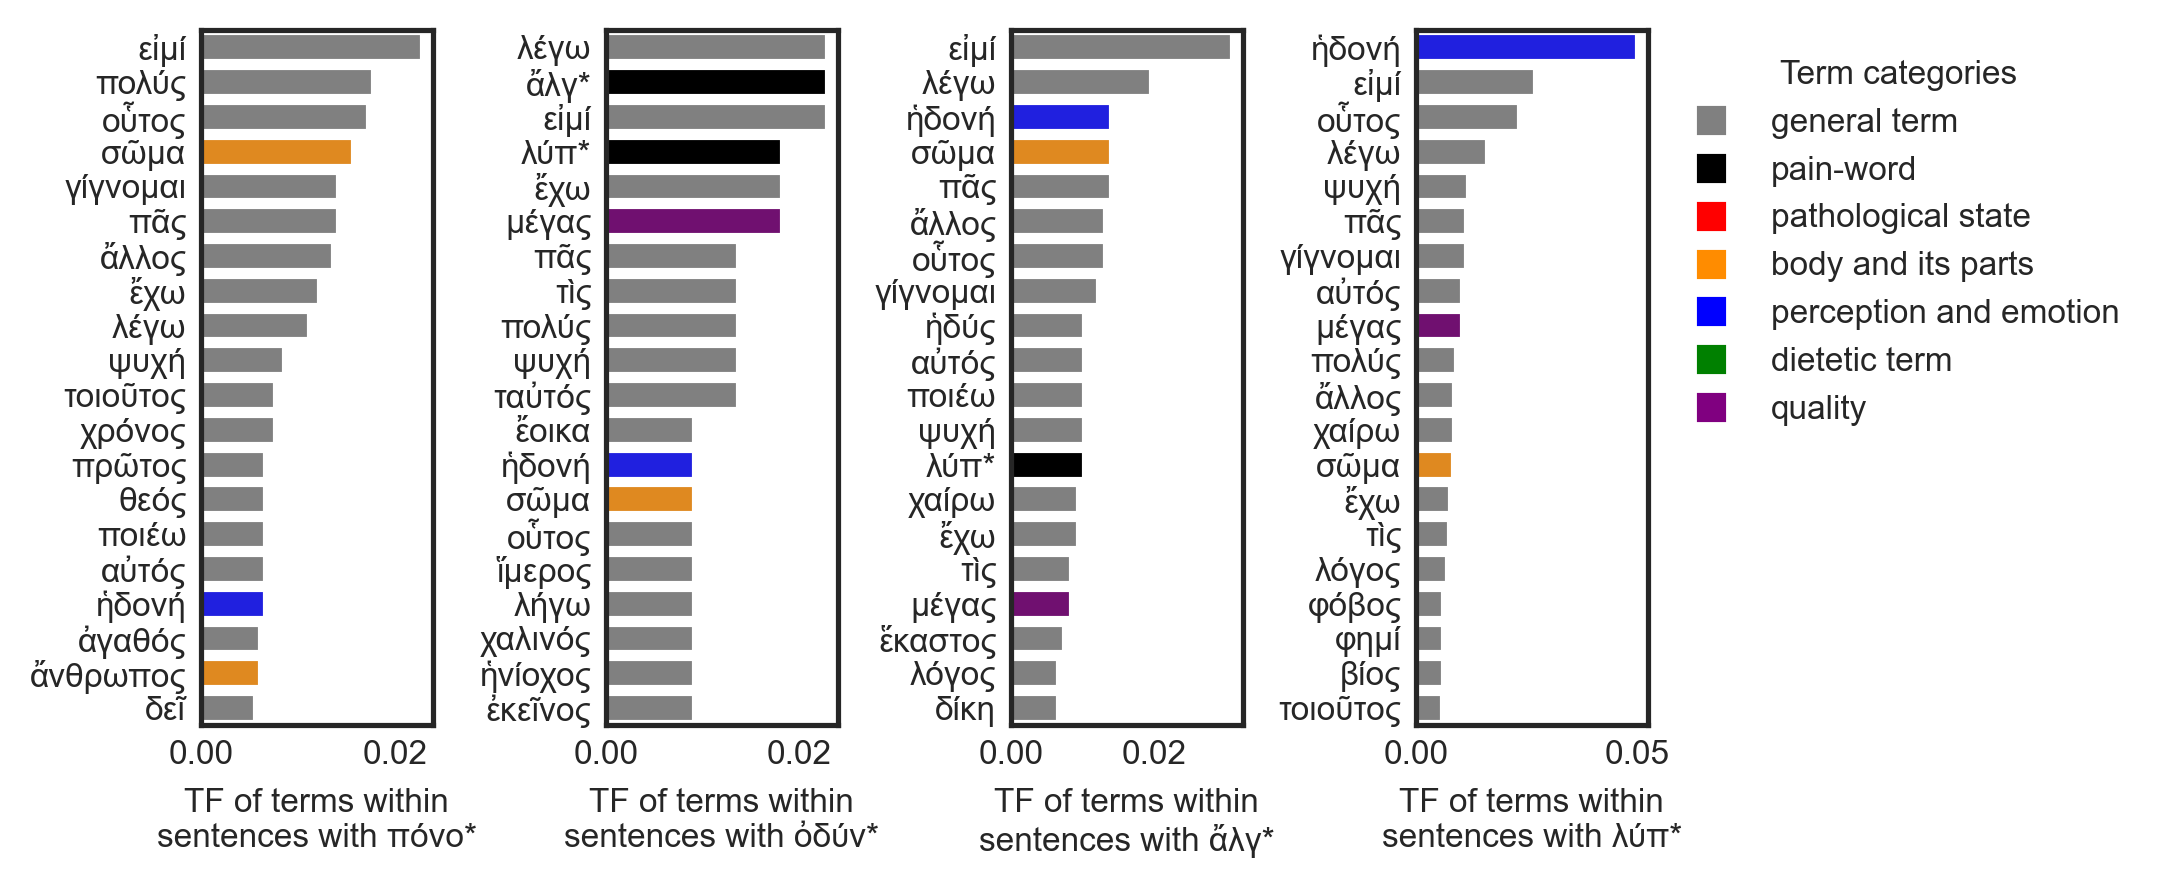

In [42]:
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 8

fig, axs = plt.subplots(1, 4, figsize=[7.25,3], tight_layout=True)

# manually define category-color pairs
cat_colors_dict = {'general term': 'gray',
 'pain-word': 'black',
 'pathological state': 'red',
 'body and its parts': 'darkorange',
 'perception and emotion' : 'blue',
 'dietetic term': 'green',
 'quality': 'purple'}
terms_by_col_dict = {}
for key in terms_by_cat_dict.keys():
    #print(key)
    terms_by_col_dict[key] = cat_colors_dict[terms_by_cat_dict[key]]

for word, ax in zip(key_words, axs):
    xcol = wordlists_freqs_df[word + " TFs"]
    ycol = wordlists_freqs_df[word + " words"]
    actual_colors = []
    for w in ycol:
        try:
            actual_colors.append(terms_by_col_dict[w])
        except:
            actual_colors.append("grey")
    #actual_colors = [terms_by_col_dict[word] for word in ycol]
    sns.barplot(x=xcol, y=ycol, palette=actual_colors, ax=ax)
    ax.set(ylabel="", xlabel="TF of terms within\nsentences with " + word)
    ax.set_yticklabels(wordlists_freqs_df[word + " words"], fontsize=8)

plt.subplots_adjust(hspace=0.08) # top=1, bottom=0, left=0, right=1, hspace=0.08, wspace=1.2)

#plt.title("Most frequent terms in sentences containing pain-words                       ", loc="right")

markers = [plt.Line2D([0,0],[0,0],color=color, marker="s", linestyle="") for color in cat_colors_dict.values()]
plt.legend(markers, cat_colors_dict.keys(), numpoints=1,  fontsize=8, title="Term categories", bbox_to_anchor=(1, 1), loc='upper left')

In [27]:
fig.savefig("../figures/terms_in_sentences_plato.png")

# TFIDF

In [21]:
def term_idf(term):
    idf_raw =  len(all_sents) / len([sent for sent in all_sents if term in sent])
    idf_log = math.log(idf_raw)
    return idf_log

In [22]:
pain_words_sents = {}
for col in [col for col in c_hippocraticum.columns if "*_sents" in col]:
    pain_words_sents[col.partition("_")[0] + "_all_sents"] = {}
    list_of_lists = c_hippocraticum[col].tolist()
    words = [word for doc in list_of_lists for word in doc if word != col.partition("_")[0]]
    word_counts = nltk.FreqDist(words).most_common()
    FD = [(tup[0] , np.round(tup[1]  / len(words), 5)) for tup in word_counts]
    TFIDF = [(tup[0], np.round(tup[1] * term_idf(tup[0]), 5)) for tup in FD]
    TFIDF = sorted(TFIDF, key=lambda tup: tup[1], reverse=True)    
    pain_words_sents[col.partition("_")[0] + "_all_sents"] = {"words" : words, "word_counts" : word_counts, "FD" : FD, "TFIDF": TFIDF}

In [23]:
pain_words_sents.keys()

dict_keys(['πόνο*_all_sents', 'ὀδύν*_all_sents', 'ἄλγ*_all_sents', 'λύπ*_all_sents'])

In [24]:
pain_words_sents["λύπ*_all_sents"]["FD"]

[('εἰμί', 0.04023),
 ('γίγνομαι', 0.02299),
 ('ἄνθρωπος', 0.01724),
 ('σῶμα', 0.01724),
 ('αὐτός', 0.01724),
 ('οὗτος', 0.0158),
 ('πολύς', 0.0158),
 ('κοιλία', 0.01006),
 ('οὐδείς', 0.00862),
 ('ἡμέρα', 0.00862),
 ('ἄλλος', 0.00862),
 ('ἔχω', 0.00862),
 ('ὀλίγος', 0.00862),
 ('χρόνος', 0.00718),
 ('συμβαίνω', 0.00718),
 ('πόνο*', 0.00718),
 ('ἐσθίω', 0.00718),
 ('ψυχρός', 0.00575),
 ('πυρετός', 0.00575),
 ('ποιέω', 0.00575),
 ('πρῶτος', 0.00431),
 ('πάρειμι', 0.00431),
 ('τρίτος', 0.00431),
 ('ἰσχυρός', 0.00431),
 ('χρή', 0.00431),
 ('τοιοῦτος', 0.00431),
 ('κεφαλή', 0.00431),
 ('λαμβάνω', 0.00431),
 ('ὀστέον', 0.00431),
 ('ψυχή', 0.00431),
 ('λέγω', 0.00431),
 ('προσήκω', 0.00431),
 ('ἕτερος', 0.00431),
 ('ἐξέρχομαι', 0.00431),
 ('χολή', 0.00431),
 ('πῦρ', 0.00431),
 ('ἰκμάς', 0.00431),
 ('τὶς', 0.00431),
 ('ὑγιής', 0.00431),
 ('πᾶς', 0.00431),
 ('πίνω', 0.00431),
 ('χροιά', 0.00431),
 ('μήτρα', 0.00431),
 ('πρόσωπον', 0.00431),
 ('γονή', 0.00431),
 ('δεῖ', 0.00431),
 ('μεμιγμένα', 0

In [25]:
tfidf_lists = []
for key in pain_words_sents.keys():
    tfidf_lists.append(pain_words_sents[key]["TFIDF"][:20])

In [26]:
tfidf_20_df = pd.DataFrame(tfidf_lists).T#  
tfidf_20_df.columns=pain_words_sents.keys()
tfidf_20_df

,πόνο*_all_sents,ὀδύν*_all_sents,ἄλγ*_all_sents,λύπ*_all_sents
0,"(σῶμα, 0.0509)","(ἔχω, 0.06531)","(κεφαλή, 0.0629)","(εἰμί, 0.0804)"
1,"(γίγνομαι, 0.04894)","(πυρετός, 0.05324)","(πυρετός, 0.06213)","(ἄνθρωπος, 0.06375)"
2,"(πολύς, 0.04855)","(γίγνομαι, 0.0528)","(ὀσφῦς, 0.05419)","(αὐτός, 0.05494)"
3,"(εἰμί, 0.03569)","(γαστήρ, 0.04895)","(ὀδύν*, 0.05028)","(σῶμα, 0.05242)"
4,"(ἄλλος, 0.03276)","(κεφαλή, 0.0436)","(ἔχω, 0.04635)","(γίγνομαι, 0.04959)"
5,"(πυρετός, 0.03228)","(ἴσχω, 0.04171)","(γαστήρ, 0.0451)","(συμβαίνω, 0.04236)"
6,"(ἔχω, 0.03166)","(ἰξύς, 0.03739)","(κοιλία, 0.04028)","(πολύς, 0.03877)"
7,"(κοιλία, 0.03114)","(παρέχω, 0.03574)","(γίγνομαι, 0.03874)","(οὐδείς, 0.03875)"
8,"(πᾶς, 0.02696)","(πολύς, 0.0357)","(εἰμί, 0.03707)","(οὗτος, 0.037)"
9,"(χρόνος, 0.02619)","(κενεών, 0.03375)","(ἴσχω, 0.02834)","(ἐσθίω, 0.03409)"


In [27]:
df_columns = []
tfidf_20_split = []
for column in tfidf_20_df.columns:
    tfidf_20_split.append([tup[0] for tup in tfidf_20_df[column].tolist()])
    tfidf_20_split.append([tup[1] for tup in tfidf_20_df[column].tolist()])
    df_columns.extend([column.partition("_")[0] + "_words", column.partition("_")[0] + "_TFIDFs"])

In [35]:
tfidf_20_split_df = pd.DataFrame(tfidf_20_split).T
tfidf_20_split_df.columns = df_columns
tfidf_20_split_df

,πόνο*_words,πόνο*_TFIDFs,ὀδύν*_words,ὀδύν*_TFIDFs,ἄλγ*_words,ἄλγ*_TFIDFs,λύπ*_words,λύπ*_TFIDFs
0,σῶμα,0.0509,ἔχω,0.06531,κεφαλή,0.0629,εἰμί,0.0804
1,γίγνομαι,0.04894,πυρετός,0.05324,πυρετός,0.06213,ἄνθρωπος,0.06375
2,πολύς,0.04855,γίγνομαι,0.0528,ὀσφῦς,0.05419,αὐτός,0.05494
3,εἰμί,0.03569,γαστήρ,0.04895,ὀδύν*,0.05028,σῶμα,0.05242
4,ἄλλος,0.03276,κεφαλή,0.0436,ἔχω,0.04635,γίγνομαι,0.04959
5,πυρετός,0.03228,ἴσχω,0.04171,γαστήρ,0.0451,συμβαίνω,0.04236
6,ἔχω,0.03166,ἰξύς,0.03739,κοιλία,0.04028,πολύς,0.03877
7,κοιλία,0.03114,παρέχω,0.03574,γίγνομαι,0.03874,οὐδείς,0.03875
8,πᾶς,0.02696,πολύς,0.0357,εἰμί,0.03707,οὗτος,0.037
9,χρόνος,0.02619,κενεών,0.03375,ἴσχω,0.02834,ἐσθίω,0.03409


In [29]:
words = []
for key_word in key_words:
    words.extend(tfidf_20_split_df[key_word + "_words"].tolist())
tfidf_unique_words = list(set(words))
len(tfidf_unique_words)

49

In [30]:
print(tfidf_unique_words)

['πολύς', 'παρέχω', 'συμβαίνω', 'ἰξύς', 'ὀλίγος', 'μήτρα', 'ἐξέρχομαι', 'πυρετός', 'ὀδύν*', 'ἄλλος', 'ἀειδής', 'πόνο*', 'πλευροῦ', 'κενεών', 'ὀσφῦς', 'ἄνθρωπος', 'σάρξ', 'οὗτος', 'χολή', 'τράχηλος', 'γίγνομαι', 'ἰσχυρός', 'ἡμέρα', 'ὀξύς', 'ἴσχω', 'προσήκω', 'νειαίρην', 'σῖτος', 'οὐδείς', 'γαστήρ', 'χρόνος', 'παύω', 'στῆθος', 'σιτίον', 'ἔχω', 'αὐτός', 'μεμιγμένα', 'πᾶς', 'σῶμα', 'ῥῖγος', 'κεφαλή', 'λαμβάνω', 'ἐσθίω', 'ἐπίνοσον', 'αἷμα', 'κοιλία', 'ἄλγ*', 'εἰμί', 'βήξ']


In [33]:
# manually define category-color pairs
cat_colors_dict = {'general term': 'gray',
 'pain-word': 'black',
 'pathological state': 'red',
 'body and its parts': 'darkorange',
 'perception and emotion' : 'blue',
 'dietetic term': 'green',
 'quality': 'purple'}
terms_by_col_dict = {}
for key in terms_by_cat_dict.keys():
    #print(key)
    terms_by_col_dict[key] = cat_colors_dict[terms_by_cat_dict[key]]
terms_by_col_dict

{'πρότερος': 'gray',
 'ψυχρός': 'purple',
 'λαμβάνω': 'gray',
 'κεφαλή': 'darkorange',
 'ἰσχυρός': 'purple',
 'ἄνθρωπος': 'darkorange',
 'χολή': 'darkorange',
 'ὁπόσος': 'purple',
 'ἄλγ*': 'black',
 'τρίτος': 'gray',
 'πᾶς': 'gray',
 'πλείων': 'gray',
 'σάρξ': 'darkorange',
 'συμβαίνω': 'gray',
 'θερμός': 'purple',
 'μαλλός': 'gray',
 'ἡμέρα': 'gray',
 'πόνο*': 'black',
 'ὀδύν*': 'black',
 'κοιλία': 'darkorange',
 'εἶμι': 'gray',
 'ποιέω': 'gray',
 'γίγνομαι': 'gray',
 'ἔχω': 'gray',
 'καθίημι': 'gray',
 'δοκέω': 'gray',
 'δίδωμι': 'gray',
 'ὀξύς': 'purple',
 'πολύς': 'gray',
 'μήτρα': 'darkorange',
 'ἰξύς': 'darkorange',
 'κενεών': 'darkorange',
 'χρόνος': 'gray',
 'σιτίον': 'red',
 'ἴσχω': 'gray',
 'ἐσθίω': 'green',
 'νόσος': 'red',
 'σῶμα': 'darkorange',
 'ὀσφύς': 'darkorange',
 'ὀλίγος': 'purple',
 'παύω': 'gray',
 'γαστήρ': 'darkorange',
 'αἷμα': 'darkorange',
 'πυρετός': 'red',
 'ὀφθαλμός': 'darkorange',
 'οὗτος': 'gray',
 'ἄλλος': 'gray',
 'αὐτός': 'gray',
 'εἰμί': 'gray',
 'λύπ

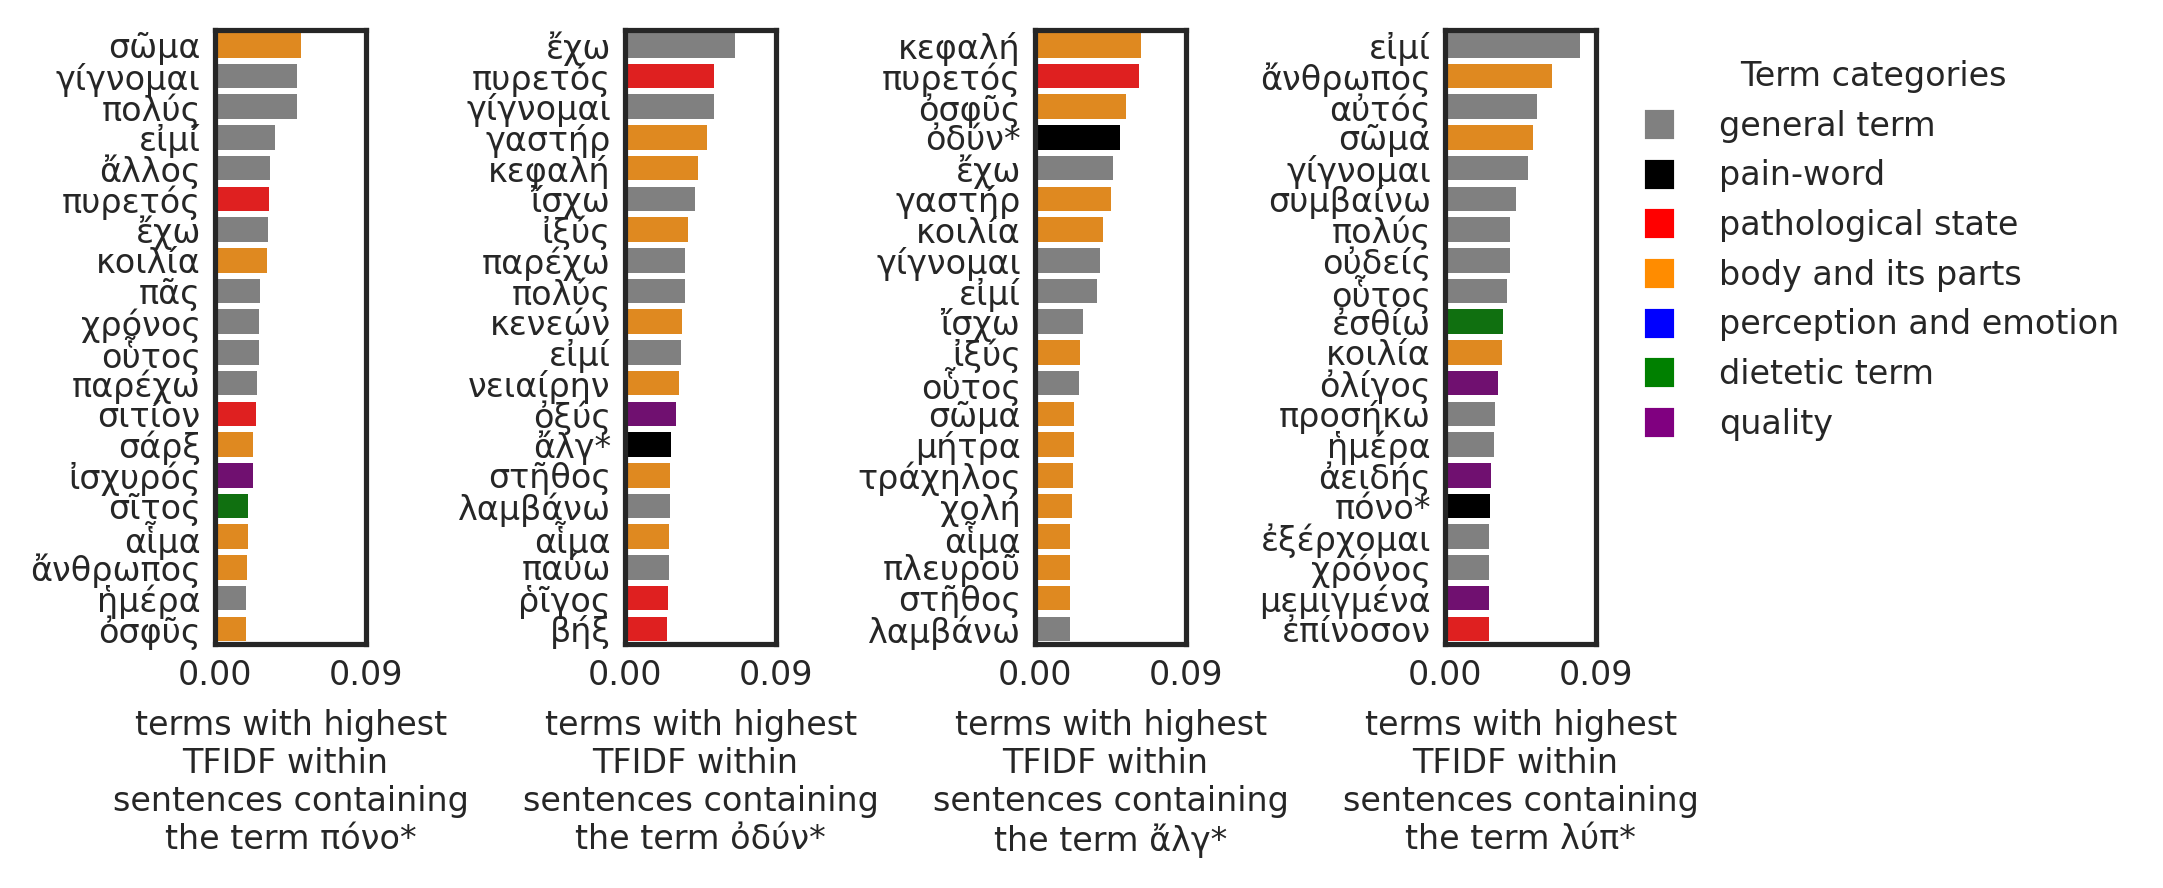

In [37]:
fig, axs = plt.subplots(1, 4, figsize=[7.25, 3], tight_layout=True)


for word, ax in zip(key_words, axs):
    xcol = tfidf_20_split_df[word + "_TFIDFs"].tolist()
    ycol = tfidf_20_split_df[word + "_words"].tolist()
    actual_colors = [terms_by_col_dict[word] for word in ycol]
    sns.barplot(x=xcol, y=ycol, palette=actual_colors, ax=ax)
    ax.set(ylabel="")
    ax.set_xlabel("terms with highest\nTFIDF within \nsentences containing\nthe term " + word, fontsize=8)
    ax.set_xticks([0, 0.09])
    ax.set_xlim(0, 0.09)
    ax.set_yticklabels(tfidf_20_split_df[word + "_words"], fontsize=8)

#plt.subplots_adjust(wspace=0.2) # top=1, bottom=0, left=0, right=1, hspace=0.08, wspace=1.2)
#plt.title("Most frequent terms in sentences containing pain-words                       ", loc="right")

markers = [plt.Line2D([0,0],[0,0],color=color, marker="s", linestyle="") for color in cat_colors_dict.values()]
plt.legend(markers, cat_colors_dict.keys(), fontsize=8, numpoints=1,  title="Term categories", bbox_to_anchor=(1, 1), loc='upper left')

In [38]:
fig.savefig("../figures/tfidfs_in_sentences.png")

In [39]:
conf = sddk.configure()
sddk.write_file("public_data/PIA/tfidfs_in_sentences.png",fig, conf)

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
endpoint variable has been configured to: https://sciencedata.dk/files/
A file with the same name ("tfidfs_in_sentences.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/public_data/PIA/tfidfs_in_sentences.png"
